In [2]:
df = pd.read_csv('car_evaluation__new.csv')
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


<Axes: >

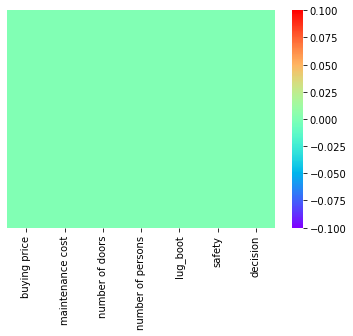

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='rainbow')

In [5]:
df.tail(10)

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [6]:
df.shape

(1728, 7)

In [7]:
print("no.of rows",df.shape[0])

no.of rows 1728


In [8]:
print("no.of columns",df.shape[1])

no.of columns 7


In [9]:
print(df.isnull().values.any())

False


<Axes: >

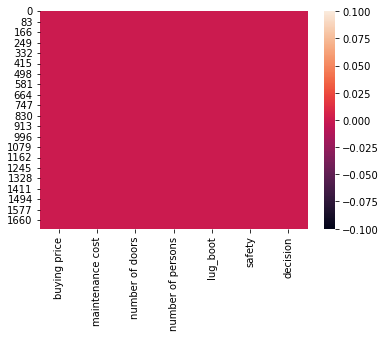

In [10]:
sns.heatmap(df.isnull())

In [11]:
dup_data=df.duplicated().any()
print(dup_data)

False


In [12]:
df.describe()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [13]:
df.describe(include='all')

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [14]:
#Training the data

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample data 
data = {
    'buying price': ['vhigh', 'high', 'med', 'low'] * 432,
    'maintenance cost': ['vhigh', 'high', 'med', 'low'] * 432,
    'number of doors': ['2', '3', '4', '5more'] * 432,
    'number of persons': ['2', '4', 'more'] * 576,
    'lug_boot': ['small', 'med', 'big'] * 576,
    'safety': ['low', 'med', 'high'] * 576,
    'decision': ['unacc', 'acc', 'good', 'vgood'] * 432
}

df = pd.DataFrame(data)

# first few rows of the dataset
print(df.head())

# Encode categorical features as numbers
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features and target
X = df.drop(columns=['decision'])
y = df['decision']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

  buying price maintenance cost number of doors number of persons lug_boot  \
0        vhigh            vhigh               2                 2    small   
1         high             high               3                 4      med   
2          med              med               4              more      big   
3          low              low           5more                 2    small   
4        vhigh            vhigh               2                 4      med   

  safety decision  
0    low    unacc  
1    med      acc  
2   high     good  
3    low    vgood  
4    med    unacc  
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       125

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00 

In [ ]:
#Testing the data

In [16]:
import joblib

# Sample data 
data = {
    'buying price': ['vhigh', 'high', 'med', 'low'] * 432,
    'maintenance cost': ['vhigh', 'high', 'med', 'low'] * 432,
    'number of doors': ['2', '3', '4', '5more'] * 432,
    'number of persons': ['2', '4', 'more'] * 576,
    'lug_boot': ['small', 'med', 'big'] * 576,
    'safety': ['low', 'med', 'high'] * 576,
    'decision': ['unacc', 'acc', 'good', 'vgood'] * 432
}

df = pd.DataFrame(data)

# Encode categorical features as numbers
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features and target
X = df.drop(columns=['decision'])
y = df['decision']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Save the model
joblib.dump(clf, 'decision_tree_model.pkl')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
#Predicting the data

In [17]:
# Load the saved model
clf = joblib.load('decision_tree_model.pkl')

# Load the label encoders
label_encoders = joblib.load('label_encoders.pkl')

# Define new data for prediction (ensure it matches the structure of the training data)
new_data = {
    'buying price': ['low', 'med'],
    'maintenance cost': ['low', 'med'],
    'number of doors': ['2', '4'],
    'number of persons': ['2', '4'],
    'lug_boot': ['small', 'big'],
    'safety': ['high', 'med']
}
new_df = pd.DataFrame(new_data)

# Encode the new data using the same label encoders
for column in new_df.columns:
    le = label_encoders[column]
    new_df[column] = le.transform(new_df[column])

# Make predictions
predictions = clf.predict(new_df)

# Optionally decode the predictions back to original labels
decoded_predictions = label_encoders['decision'].inverse_transform(predictions)

# Output the predictions
print("Predicted classes:", decoded_predictions)

Predicted classes: ['vgood' 'good']


In [ ]:
#Conclusion